In [1]:
import nltk, re, pprint
from nltk import word_tokenize
import pandas as pd
import numpy as np
import re

m_andy = pd.read_csv('data/Andy-Weir-The-Martian.csv')
m_andy.head()

,score,url,title,text
0,4,/gp/customer-reviews/RKMO449VT48H3?ASIN=149159...,4.7573214851 Stars,"<span class=""a-size-base review-text"">I'm a ha..."
1,3,/gp/customer-reviews/R3RDNZNCOMRN0K?ASIN=14915...,Who needs nail clippers?,"<span class=""a-size-base review-text"">""I'm str..."
2,4,/gp/customer-reviews/R1TC15NPCF9GMW?ASIN=14915...,Abandoned on Mars,"<span class=""a-size-base review-text"">A futuri..."
3,5,/gp/customer-reviews/RT3R8XN5KZZGW?ASIN=149159...,Excellent Story,"<span class=""a-size-base review-text"">Follow t..."
4,5,/gp/customer-reviews/R32NNLGY7QGRVJ?ASIN=14915...,Inventive humorous tedious,"<span class=""a-size-base review-text"">This is ..."


In [2]:
#Taking only the text field and dropping remaining
m_andy.drop(m_andy.columns[[0,1,2]], axis=1, inplace=True)
m_andy.head()

,text
0,"<span class=""a-size-base review-text"">I'm a ha..."
1,"<span class=""a-size-base review-text"">""I'm str..."
2,"<span class=""a-size-base review-text"">A futuri..."
3,"<span class=""a-size-base review-text"">Follow t..."
4,"<span class=""a-size-base review-text"">This is ..."


In [19]:
#Stripping the text of all HTML tags
m_andy['text'] = m_andy['text'].replace(['<[^>]+>'],[''],regex=True)

#Stripping the text of all special characters
m_andy['text'] = m_andy['text'].replace(['([^\s\w]|_|[0-9])+'],[''],regex=True)
m_andy.head()

,text
0,Im a hardscience science fiction fan and would...
1,Im stranded on Mars I have no way to communica...
2,A futuristic Robinson Crusoe Due to a dust sto...
3,Follow the adventure of an astronaut as he tri...
4,This is in some ways a delightful book Its in...


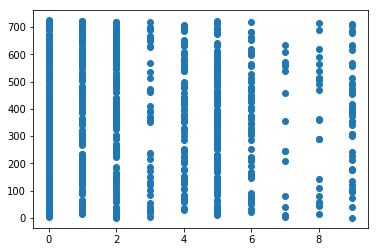

CPU times: user 172 ms, sys: 148 ms, total: 320 ms
Wall time: 146 ms


[1, 1, 1, 1, 0, 0, 3, 2, 3, 4]

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(m_andy['text'][:10])

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10, n_iter=17, random_state=42)
#X = svd.fit_transform(X)

#pca = PCA(n_components=10).fit(X)
#data2D = pca.transform(X)
a, b = np.nonzero(X)
plt.scatter(a, b)
plt.show() 

from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(X)

clusters = km.labels_.tolist()
clusters